In [1]:
# load packages
library(purrr)          |> suppressPackageStartupMessages()
library(Rgraphviz)      |> suppressPackageStartupMessages()
library(bnlearn)        |> suppressPackageStartupMessages()
library(bnstruct)       |> suppressPackageStartupMessages()
source('K2methods.r')   |> suppressPackageStartupMessages()

Loading required package: graph

Loading required package: BiocGenerics

Loading required package: parallel




Attaching package: 'BiocGenerics'


The following objects are masked from 'package:parallel':

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from 'package:stats':

    IQR, mad, sd, var, xtabs


The following objects are masked from 'package:base':

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, which.min


Loading required package: grid

Loading required package: bitops

Loading required package: igraph


Attaching package: 'igraph'


The following objects are masked from 'package:bnlearn':

  

In [2]:
data = asia()
data = impute(data)
data = imputed.data(data)

bnstruct :: performing imputation ...

bnstruct :: imputation finished.



In [3]:
mode(data) = 'character'
DF = data.frame(data, stringsAsFactors = TRUE)

colnames(DF) <- asia()@variables
head(DF)

,Asia,Tubercolosys,Smoke,LungCancer,Bronchitis,Either,X-ray,Dyspnea
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,2,2,1,1,1,2,1,2
2,2,1,1,1,1,1,2,1
3,1,1,2,1,1,1,2,1
4,2,1,2,1,1,1,2,1
5,2,1,2,1,1,1,1,2
6,2,1,2,1,1,1,2,2


In [4]:
today = 03072023 # default seed = 12345

In [5]:
struct = K2(n = ncol(DF), u = 8, D = DF, seed=today, num.iterations=50)

order = Asia Tubercolosys Smoke LungCancer Bronchitis Either X-ray Dyspnea 
Running iteration # 1 u = 1 
The Network score is -23361.58 
  Running iteration # 1 u = 2 
The Network score is -22481.35 
  Running iteration # 1 u = 3 
The Network score is -22481.35 
  Running iteration # 1 u = 4 
The Network score is -22481.35 
  Running iteration # 1 u = 5 
The Network score is -22481.35 
  Running iteration # 1 u = 6 
The Network score is -22481.35 
  Running iteration # 1 u = 7 
The Network score is -22481.35 
  Running iteration # 1 u = 8 
The Network score is -22481.35 
  order = Smoke Dyspnea Bronchitis LungCancer X-ray Either Tubercolosys Asia 
Running iteration # 2 u = 1 
The Network score is -23362.6 
  Running iteration # 2 u = 2 
The Network score is -22627.75 
  Running iteration # 2 u = 3 
The Network score is -22554.75 
  Running iteration # 2 u = 4 
The Network score is -22554.75 
  Running iteration # 2 u = 5 
The Network score is -22554.75 
  Running iteration # 2 u = 6 
T

| $num.iteration$ |                                    order                                   |    $best-u$   | $best-score_{K2}$ |
|:---------------:|:--------------------------------------------------------------------------:|:-------------:|:-----------------:|
|        1        | Asia Tubercolosys Smoke <br>LungCancer Bronchitis Either <br>X-ray Dyspnea | 2,3,4,5,6,7,8 |     -22481.35     |
|        2        | Smoke Dyspnea Bronchitis <br>LungCancer X-ray Either <br>Tubercolosys Asia | 2,3,4,5,6,7,8 |     -22554.75     |
|        2        | Either Asia Tubercolosys <br>Bronchitis Smoke Dyspnea <br>LungCancer X-ray | 2,3,4,5,6,7,8 |      -22493.5     |
|        3        | Bronchitis LungCancer Dyspnea <br>Either Asia Tubercolosys <br>Smoke X-ray |  3,4,5,6,7,8  |     -22537.99     |
|        4        |  Bronchitis Dyspnea Smoke<br>Asia LungCancer Tubercolosys <br>Either X-ray |  3,4,5,6,7,8  |     -22522.08     |
|        5        |  Tubercolosys Bronchitis LungCancer<br>Either Asia Smoke<br>X-ray Dyspnea  | 2,3,4,5,6,7,8 |     -22486.51     |
|        6        |  Tubercolosys Smoke LungCancer<br>Asia X-ray Either<br>Bronchitis Dyspnea  | 2,3,4,5,6,7,8 |     -22503.46     |
|        7        |  Dyspnea LungCancer Bronchitis<br>Either Tubercolosys X-ray <br>Asia Smoke |  3,4,5,6,7,8  |      -22538.9     |
|        8        |  Bronchitis X-ray Smoke<br>LungCancer Dyspnea Tubercolosys <br>Either Asia |  3,4,5,6,7,8  |     -22553.67     |
|        9        | X-ray Dyspnea Smoke <br>Asia Bronchitis LungCancer <br>Tubercolosys Either |   4,5,6,7,8   |     -22630.37     |
|        10       | Bronchitis LungCancer Dyspnea <br>Tubercolosys Smoke Asia <br>Either X-ray |  3,4,5,6,7,8  |     -22509.45     |
|     $\vdots$    |                                  $\vdots$                                  |    $\vdots$   |      $\vdots$     |
|        50       | Tubercolosys Either Smoke <br>X-ray Dyspnea Asia <br>LungCancer Bronchitis | 2,3,4,5,6,7,8 |     -22494.43     |

In [6]:
struct

$dag
$dag[[1]]
[1] NA

$dag[[2]]
[1] 1

$dag[[3]]
[1] 1

$dag[[4]]
[1] NA

$dag[[5]]
[1] 4

$dag[[6]]
[1] 2 5

$dag[[7]]
[1] 6

$dag[[8]]
[1] 3 6


$score
[1] -22481.35

$order
[1] "Asia"         "Tubercolosys" "Smoke"        "LungCancer"   "Bronchitis"  
[6] "Either"       "X-ray"        "Dyspnea"     

$u
[1] 2

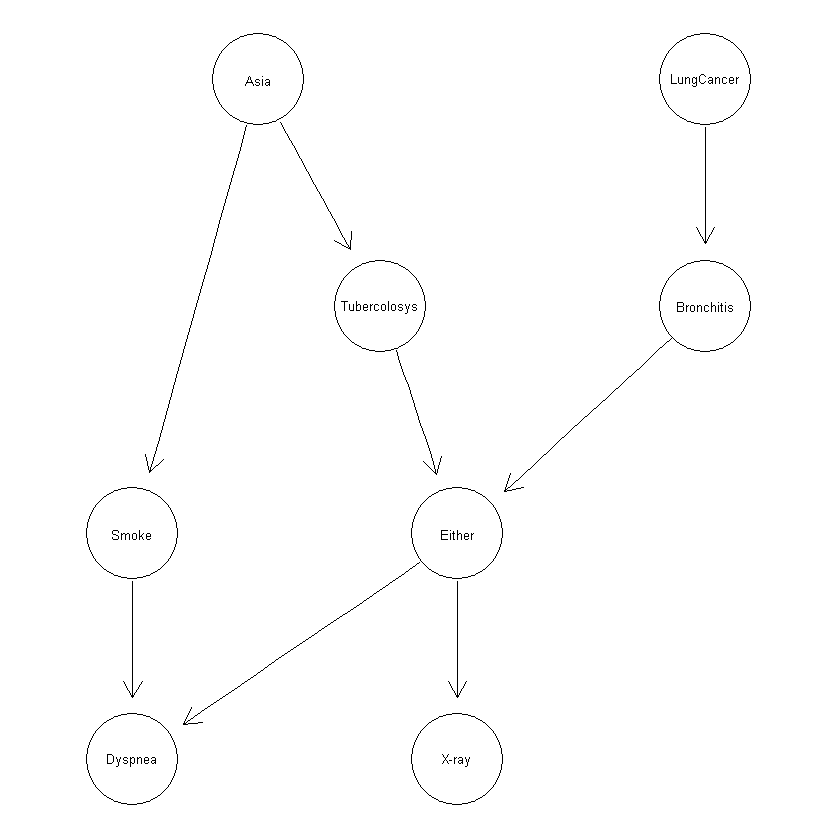

In [7]:
dag = get_dag(names(DF), struct$dag)
graphviz.plot(dag)

## `bnlearn` comparison

In [8]:
bn_bayes = bn.fit(dag, data = DF, method = 'bayes', iss = 10)
bn_bayes


  Bayesian network parameters

  Parameters of node Asia (multinomial distribution)

Conditional probability table:
         1         2 
0.4953047 0.5046953 

  Parameters of node Bronchitis (multinomial distribution)

Conditional probability table:
 
          LungCancer
Bronchitis          1          2
         1 0.98865127 0.91237113
         2 0.01134873 0.08762887

  Parameters of node Dyspnea (multinomial distribution)

Conditional probability table:
 
, , Smoke = 1

       Either
Dyspnea         1         2
      1 0.8956526 0.2996604
      2 0.1043474 0.7003396

, , Smoke = 2

       Either
Dyspnea         1         2
      1 0.2066524 0.0786736
      2 0.7933476 0.9213264


  Parameters of node Either (multinomial distribution)

Conditional probability table:
 
, , Tubercolosys = 1

      Bronchitis
Either           1           2
     1 0.999866002 0.010917031
     2 0.000133998 0.989082969

, , Tubercolosys = 2

      Bronchitis
Either           1           2
     1 0.00223

In [9]:
# recall that when we make this test H_0 = (x, y) are independent
ci.test(x = 'Asia', y = 'Tubercolosys', z = 'X-ray', data = DF, test = 'mi')

# this shows that since the p-value is low, by 
# taking a 5% significance level we can reject the null 
# hyp and say that x3 and x2 depend on each other


	Mutual Information (disc.)

data:  Asia ~ Tubercolosys | X-ray
mi = 313.65, df = 2, p-value < 2.2e-16
alternative hypothesis: true value is greater than 0


In [10]:
# this may say something about the structure we got through K2
ci.test(x = 'Dyspnea', y = 'Asia', z = 'Smoke', data = DF, test = 'mi')


	Mutual Information (disc.)

data:  Dyspnea ~ Asia | Smoke
mi = 20.932, df = 2, p-value = 2.848e-05
alternative hypothesis: true value is greater than 0


In [11]:
# evaluate the score of our network
score(dag, data = DF, type = 'bic')
score(dag, data = DF, type = 'bde')

[1] -22481.35

[1] -22466.4

In [12]:
arc.strength(dag, data=DF, criterion="x2")

,from,to,strength
,<chr>,<chr>,<dbl>
1,Asia,Tubercolosys,3.849045e-99
2,Asia,Smoke,1.289269e-207
3,LungCancer,Bronchitis,1.398947e-06
4,Tubercolosys,Either,0.000000e+00
5,Bronchitis,Either,0.000000e+00
6,Either,X-ray,0.000000e+00
7,Smoke,Dyspnea,0.000000e+00
8,Either,Dyspnea,4.697936e-191


### This is the very same result that we get too!!! :)

In [13]:
dataset <- asia()
net <- BN(dataset)

In [14]:
net


Bayesian Network: BNDataset

num.nodes 8

variables
Asia Tubercolosys Smoke LungCancer Bronchitis Either X-ray Dyspnea
discreteness
TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
node.sizes
2 2 2 2 2 2 2 2

In [15]:
net <- learn.network(dataset)

bnstruct :: learning the structure using MMHC ...

bnstruct :: learning using MMHC completed.

bnstruct :: learning network parameters ... 

bnstruct :: parameter learning done.



In [16]:
net


Bayesian Network: BNDataset

num.nodes 8

variables
Asia Tubercolosys Smoke LungCancer Bronchitis Either X-ray Dyspnea
discreteness
TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
node.sizes
2 2 2 2 2 2 2 2
Adjacency matrix:
             Asia Tubercolosys Smoke LungCancer Bronchitis Either X-ray Dyspnea
Asia            0            1     1          0          0      0     0       0
Tubercolosys    0            0     0          0          0      1     0       0
Smoke           0            0     0          0          0      0     0       1
LungCancer      0            0     0          0          1      0     0       0
Bronchitis      0            0     0          0          0      1     0       0
Either          0            0     0          0          0      0     0       0
X-ray           0            0     0          0          0      0     0       1
Dyspnea         0            0     0          0          0      0     0       0

Conditional probability tables:$Asia
Asia
        1         2

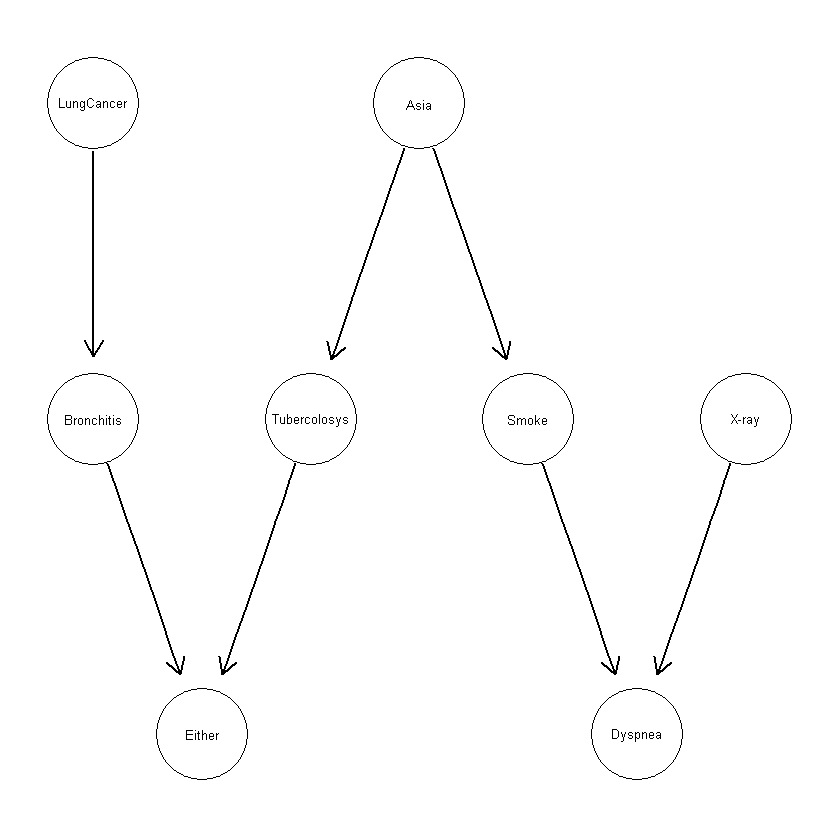

In [17]:
plot(net)

In [18]:
learned <- hc(DF)
modelstring(learned)

[1] "[Asia][LungCancer][Tubercolosys|Asia][Smoke|Asia][Bronchitis|LungCancer][Either|Tubercolosys:Bronchitis][X-ray|Either][Dyspnea|Smoke:Either]"

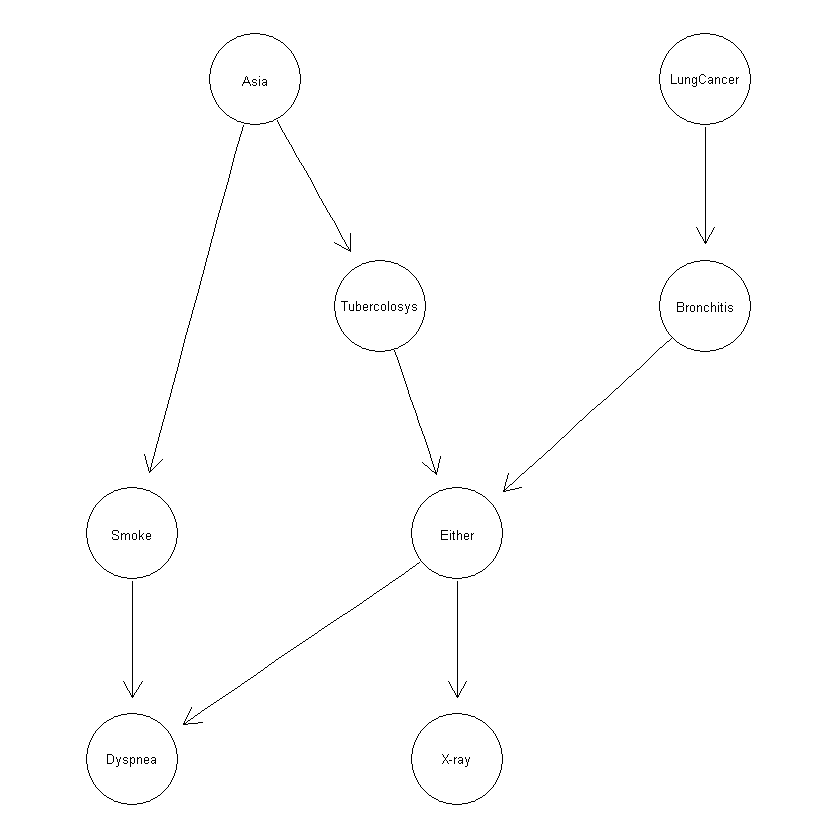

In [19]:
graphviz.plot(learned)

In [20]:
score(learned, data = DF, type = "bic")

[1] -22481.35